In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from xgboost import plot_importance, XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import time
import seaborn as sns

from tensorflow.keras.layers import (Dense, Activation, Input, Conv2D, MaxPooling2D, Flatten,
                                     GlobalMaxPooling2D, LeakyReLU, concatenate, Dropout)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [27]:
X = np.load('../project1/X.npy')
Y = np.load('../project1/Y.npy')

In [28]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]].to_numpy()
#Ydf = Y
#Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
#Ydf[['class']]
#Y2 = Ydf[['class']].to_numpy()

In [29]:
Ydf

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [31]:
X.shape

(2062, 64, 64, 1)

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Ydf, test_size=0.3, random_state=42)

In [33]:
def create_model(input_shape=(64,64,1)):
    return Sequential([
        Input(shape=input_shape),
        
        Conv2D(8,(3,3), padding='same', input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(16,(3,3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(4,(3,3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        
        Dropout(0.1),
        
        Dense(64),
        Activation('relu'),
        Dense(32),
        Activation('relu'),
        Dense(10),
        Activation('softmax')
])

In [34]:
loss='categorical_crossentropy'
LEARNING_RATE = 0.05
BATCH_SIZE = X_train.shape[0]//20 # computing the loss over the whole dataset
EPOCHS = 300
model = create_model()
model.compile(loss=loss, optimizer='adamax', metrics=['acc'],)# metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 8)         80        
_________________________________________________________________
activation_12 (Activation)   (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 4)        

In [35]:
t0 = time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
print (time()-t0)

Train on 1443 samples, validate on 619 samples
Epoch 1/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 2.3045 - acc: 0.1060 - val_loss: 2.3004 - val_acc: 0.1082
Epoch 2/300
1443/1443 [==============================] - 1s 714us/sample - loss: 2.2974 - acc: 0.1254 - val_loss: 2.2971 - val_acc: 0.1470
Epoch 3/300
1443/1443 [==============================] - 1s 723us/sample - loss: 2.2943 - acc: 0.1767 - val_loss: 2.2933 - val_acc: 0.1729
Epoch 4/300
1443/1443 [==============================] - 1s 717us/sample - loss: 2.2900 - acc: 0.1663 - val_loss: 2.2889 - val_acc: 0.1567
Epoch 5/300
1443/1443 [==============================] - 1s 740us/sample - loss: 2.2848 - acc: 0.1337 - val_loss: 2.2834 - val_acc: 0.1212
Epoch 6/300
1443/1443 [==============================] - 1s 720us/sample - loss: 2.2754 - acc: 0.1337 - val_loss: 2.2735 - val_acc: 0.1486
Epoch 7/300
1443/1443 [==============================] - 1s 773us/sample - loss: 2.2655 - acc: 0.1830 - val_loss: 2.2571 

1443/1443 [==============================] - 1s 822us/sample - loss: 0.7407 - acc: 0.7616 - val_loss: 0.6355 - val_acc: 0.7964
Epoch 60/300
1443/1443 [==============================] - 1s 795us/sample - loss: 0.6954 - acc: 0.7692 - val_loss: 0.6231 - val_acc: 0.7997
Epoch 61/300
1443/1443 [==============================] - 1s 797us/sample - loss: 0.7300 - acc: 0.7595 - val_loss: 0.6243 - val_acc: 0.8029
Epoch 62/300
1443/1443 [==============================] - 1s 831us/sample - loss: 0.7152 - acc: 0.7547 - val_loss: 0.6227 - val_acc: 0.8013
Epoch 63/300
1443/1443 [==============================] - 1s 859us/sample - loss: 0.7145 - acc: 0.7602 - val_loss: 0.6079 - val_acc: 0.8045
Epoch 64/300
1443/1443 [==============================] - 1s 805us/sample - loss: 0.7053 - acc: 0.7547 - val_loss: 0.6100 - val_acc: 0.7981
Epoch 65/300
1443/1443 [==============================] - 1s 760us/sample - loss: 0.7004 - acc: 0.7706 - val_loss: 0.5998 - val_acc: 0.8158
Epoch 66/300
1443/1443 [=========

1443/1443 [==============================] - 1s 759us/sample - loss: 0.5357 - acc: 0.8330 - val_loss: 0.4816 - val_acc: 0.8401
Epoch 118/300
1443/1443 [==============================] - 1s 774us/sample - loss: 0.5296 - acc: 0.8295 - val_loss: 0.4801 - val_acc: 0.8433
Epoch 119/300
1443/1443 [==============================] - 1s 857us/sample - loss: 0.5281 - acc: 0.8205 - val_loss: 0.4835 - val_acc: 0.8449
Epoch 120/300
1443/1443 [==============================] - 1s 801us/sample - loss: 0.5186 - acc: 0.8288 - val_loss: 0.4726 - val_acc: 0.8465
Epoch 121/300
1443/1443 [==============================] - 1s 810us/sample - loss: 0.5136 - acc: 0.8295 - val_loss: 0.4675 - val_acc: 0.8546
Epoch 122/300
1443/1443 [==============================] - 1s 824us/sample - loss: 0.5071 - acc: 0.8399 - val_loss: 0.4758 - val_acc: 0.8401
Epoch 123/300
1443/1443 [==============================] - 1s 820us/sample - loss: 0.5219 - acc: 0.8240 - val_loss: 0.4643 - val_acc: 0.8481
Epoch 124/300
1443/1443 [==

1443/1443 [==============================] - 1s 828us/sample - loss: 0.3987 - acc: 0.8718 - val_loss: 0.3922 - val_acc: 0.8788
Epoch 176/300
1443/1443 [==============================] - 1s 797us/sample - loss: 0.4217 - acc: 0.8669 - val_loss: 0.3846 - val_acc: 0.8918
Epoch 177/300
1443/1443 [==============================] - 1s 789us/sample - loss: 0.4044 - acc: 0.8697 - val_loss: 0.3807 - val_acc: 0.8821
Epoch 178/300
1443/1443 [==============================] - 1s 797us/sample - loss: 0.3812 - acc: 0.8836 - val_loss: 0.3840 - val_acc: 0.8805
Epoch 179/300
1443/1443 [==============================] - 1s 809us/sample - loss: 0.4141 - acc: 0.8579 - val_loss: 0.3884 - val_acc: 0.8740
Epoch 180/300
1443/1443 [==============================] - 1s 825us/sample - loss: 0.3778 - acc: 0.8836 - val_loss: 0.3851 - val_acc: 0.8740
Epoch 181/300
1443/1443 [==============================] - 1s 801us/sample - loss: 0.3970 - acc: 0.8697 - val_loss: 0.3780 - val_acc: 0.8821
Epoch 182/300
1443/1443 [==

1443/1443 [==============================] - 1s 761us/sample - loss: 0.3011 - acc: 0.9044 - val_loss: 0.3292 - val_acc: 0.8982
Epoch 234/300
1443/1443 [==============================] - 1s 738us/sample - loss: 0.3168 - acc: 0.8995 - val_loss: 0.3271 - val_acc: 0.8966
Epoch 235/300
1443/1443 [==============================] - 1s 743us/sample - loss: 0.3070 - acc: 0.8940 - val_loss: 0.3427 - val_acc: 0.8966
Epoch 236/300
1443/1443 [==============================] - 1s 735us/sample - loss: 0.3101 - acc: 0.8967 - val_loss: 0.3296 - val_acc: 0.8982
Epoch 237/300
1443/1443 [==============================] - 1s 740us/sample - loss: 0.2878 - acc: 0.9037 - val_loss: 0.3273 - val_acc: 0.8982
Epoch 238/300
1443/1443 [==============================] - 1s 743us/sample - loss: 0.2863 - acc: 0.9120 - val_loss: 0.3309 - val_acc: 0.9063
Epoch 239/300
1443/1443 [==============================] - 1s 749us/sample - loss: 0.3097 - acc: 0.9002 - val_loss: 0.3288 - val_acc: 0.9015
Epoch 240/300
1443/1443 [==

1443/1443 [==============================] - 1s 759us/sample - loss: 0.2381 - acc: 0.9238 - val_loss: 0.2973 - val_acc: 0.9095
Epoch 292/300
1443/1443 [==============================] - 1s 790us/sample - loss: 0.2425 - acc: 0.9293 - val_loss: 0.2943 - val_acc: 0.9128
Epoch 293/300
1443/1443 [==============================] - 1s 797us/sample - loss: 0.2348 - acc: 0.9252 - val_loss: 0.2991 - val_acc: 0.9047
Epoch 294/300
1443/1443 [==============================] - 1s 783us/sample - loss: 0.2431 - acc: 0.9210 - val_loss: 0.2986 - val_acc: 0.9063
Epoch 295/300
1443/1443 [==============================] - 1s 841us/sample - loss: 0.2257 - acc: 0.9265 - val_loss: 0.2856 - val_acc: 0.9111
Epoch 296/300
1443/1443 [==============================] - 1s 791us/sample - loss: 0.2448 - acc: 0.9238 - val_loss: 0.2881 - val_acc: 0.9095
Epoch 297/300
1443/1443 [==============================] - 1s 818us/sample - loss: 0.2395 - acc: 0.9238 - val_loss: 0.2887 - val_acc: 0.9111
Epoch 298/300
1443/1443 [==

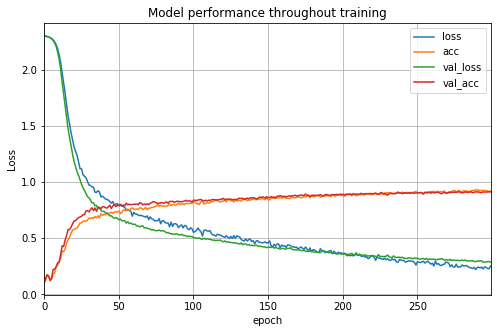

In [36]:
DataFrame(history.history).plot(figsize=(8, 5))#, logy=True)
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
y_pred = model.predict(X_valid)

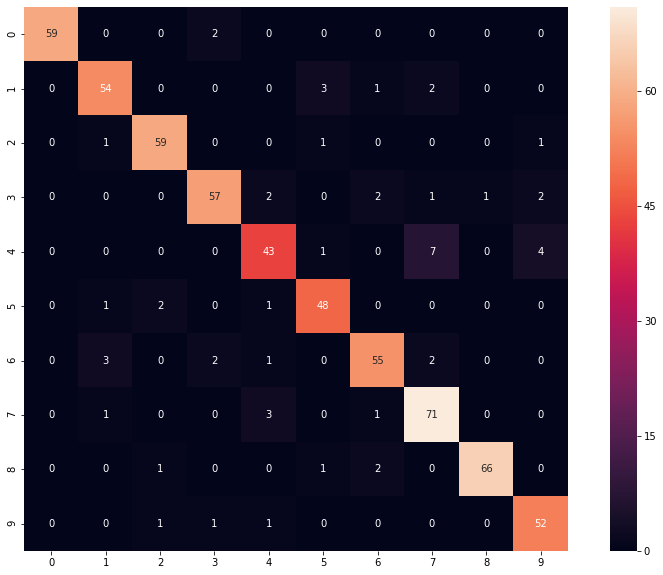

Accuracy= 0.9111470113085622


In [38]:
y_valid_class = y_valid.argmax(axis=1)
y_pred_class = y_pred.argmax(axis=1)
conf_mat = confusion_matrix(y_valid_class, y_pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy=', accuracy_score(y_valid_class, y_pred_class))

In [39]:
y_pred[0]

array([4.4740770e-07, 1.4818469e-03, 3.8157386e-06, 3.2722849e-01,
       5.0863787e-03, 2.2580130e-05, 2.0319213e-01, 4.6291628e-01,
       2.2658398e-06, 6.5697852e-05], dtype=float32)